#data preprocessing:
#Steps for Preprocessing the Dataset
#Load the Data: Load the data into a DataFrame.
#Handle Missing Values: Check and handle any missing values.
#Encode Categorical Variables: Convert categorical variables into numerical format using one-hot encoding.
#Scale Numerical Features: Standardize the numerical features to have a mean of 0 and a standard deviation of 1.
#Dimensionality Reduction: Apply PCA to reduce dimensionality if required for visualization or other purposes.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data='/content/drive/My Drive/Restraunt tips/tips.csv'
df = pd.read_csv(data)


In [4]:
print(df.isnull().sum())

# Step 2: Encode categorical variables
data_encoded = pd.get_dummies(df,columns=['sex', 'smoker', 'day', 'time'])

# Step 3: Scale numerical features
scaler = StandardScaler()
data_encoded[['total_bill', 'tip', 'size']] = scaler.fit_transform(data_encoded[['total_bill', 'tip', 'size']])

# Step 4: (Optional) Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_encoded)

# Final preprocessed data
print("Encoded and scaled data:")
print(data_encoded)

print("\nPCA reduced data (optional step):")
print(data_reduced)

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
Encoded and scaled data:
     total_bill       tip      size  sex_Female  sex_Male  smoker_No  \
0     -0.314711 -1.439947 -0.600193        True     False       True   
1     -1.063235 -0.969205  0.453383       False      True       True   
2      0.137780  0.363356  0.453383       False      True       True   
3      0.438315  0.225754 -0.600193       False      True       True   
4      0.540745  0.443020  1.506958        True     False       True   
..          ...       ...       ...         ...       ...        ...   
239    1.040511  2.115963  0.453383       False      True       True   
240    0.832275 -0.722971 -0.600193        True     False      False   
241    0.324630 -0.722971 -0.600193       False      True      False   
242   -0.221287 -0.904026 -0.600193       False      True       True   
243   -0.113229  0.001247 -0.600193        True     False 

#visualization
#matplotlib
#pairplot
#Coorelation heatmap
#Boxplot
#Violin Plot:

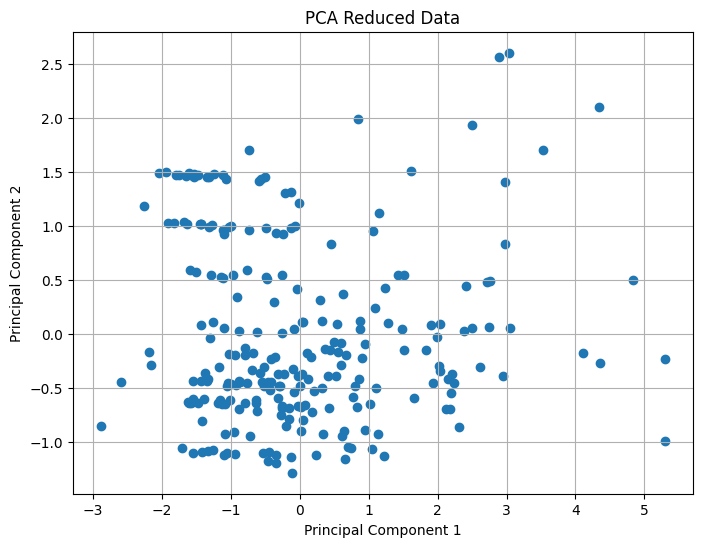

In [5]:
import matplotlib.pyplot as plt

# Visualize PCA reduced data
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1])
plt.title('PCA Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


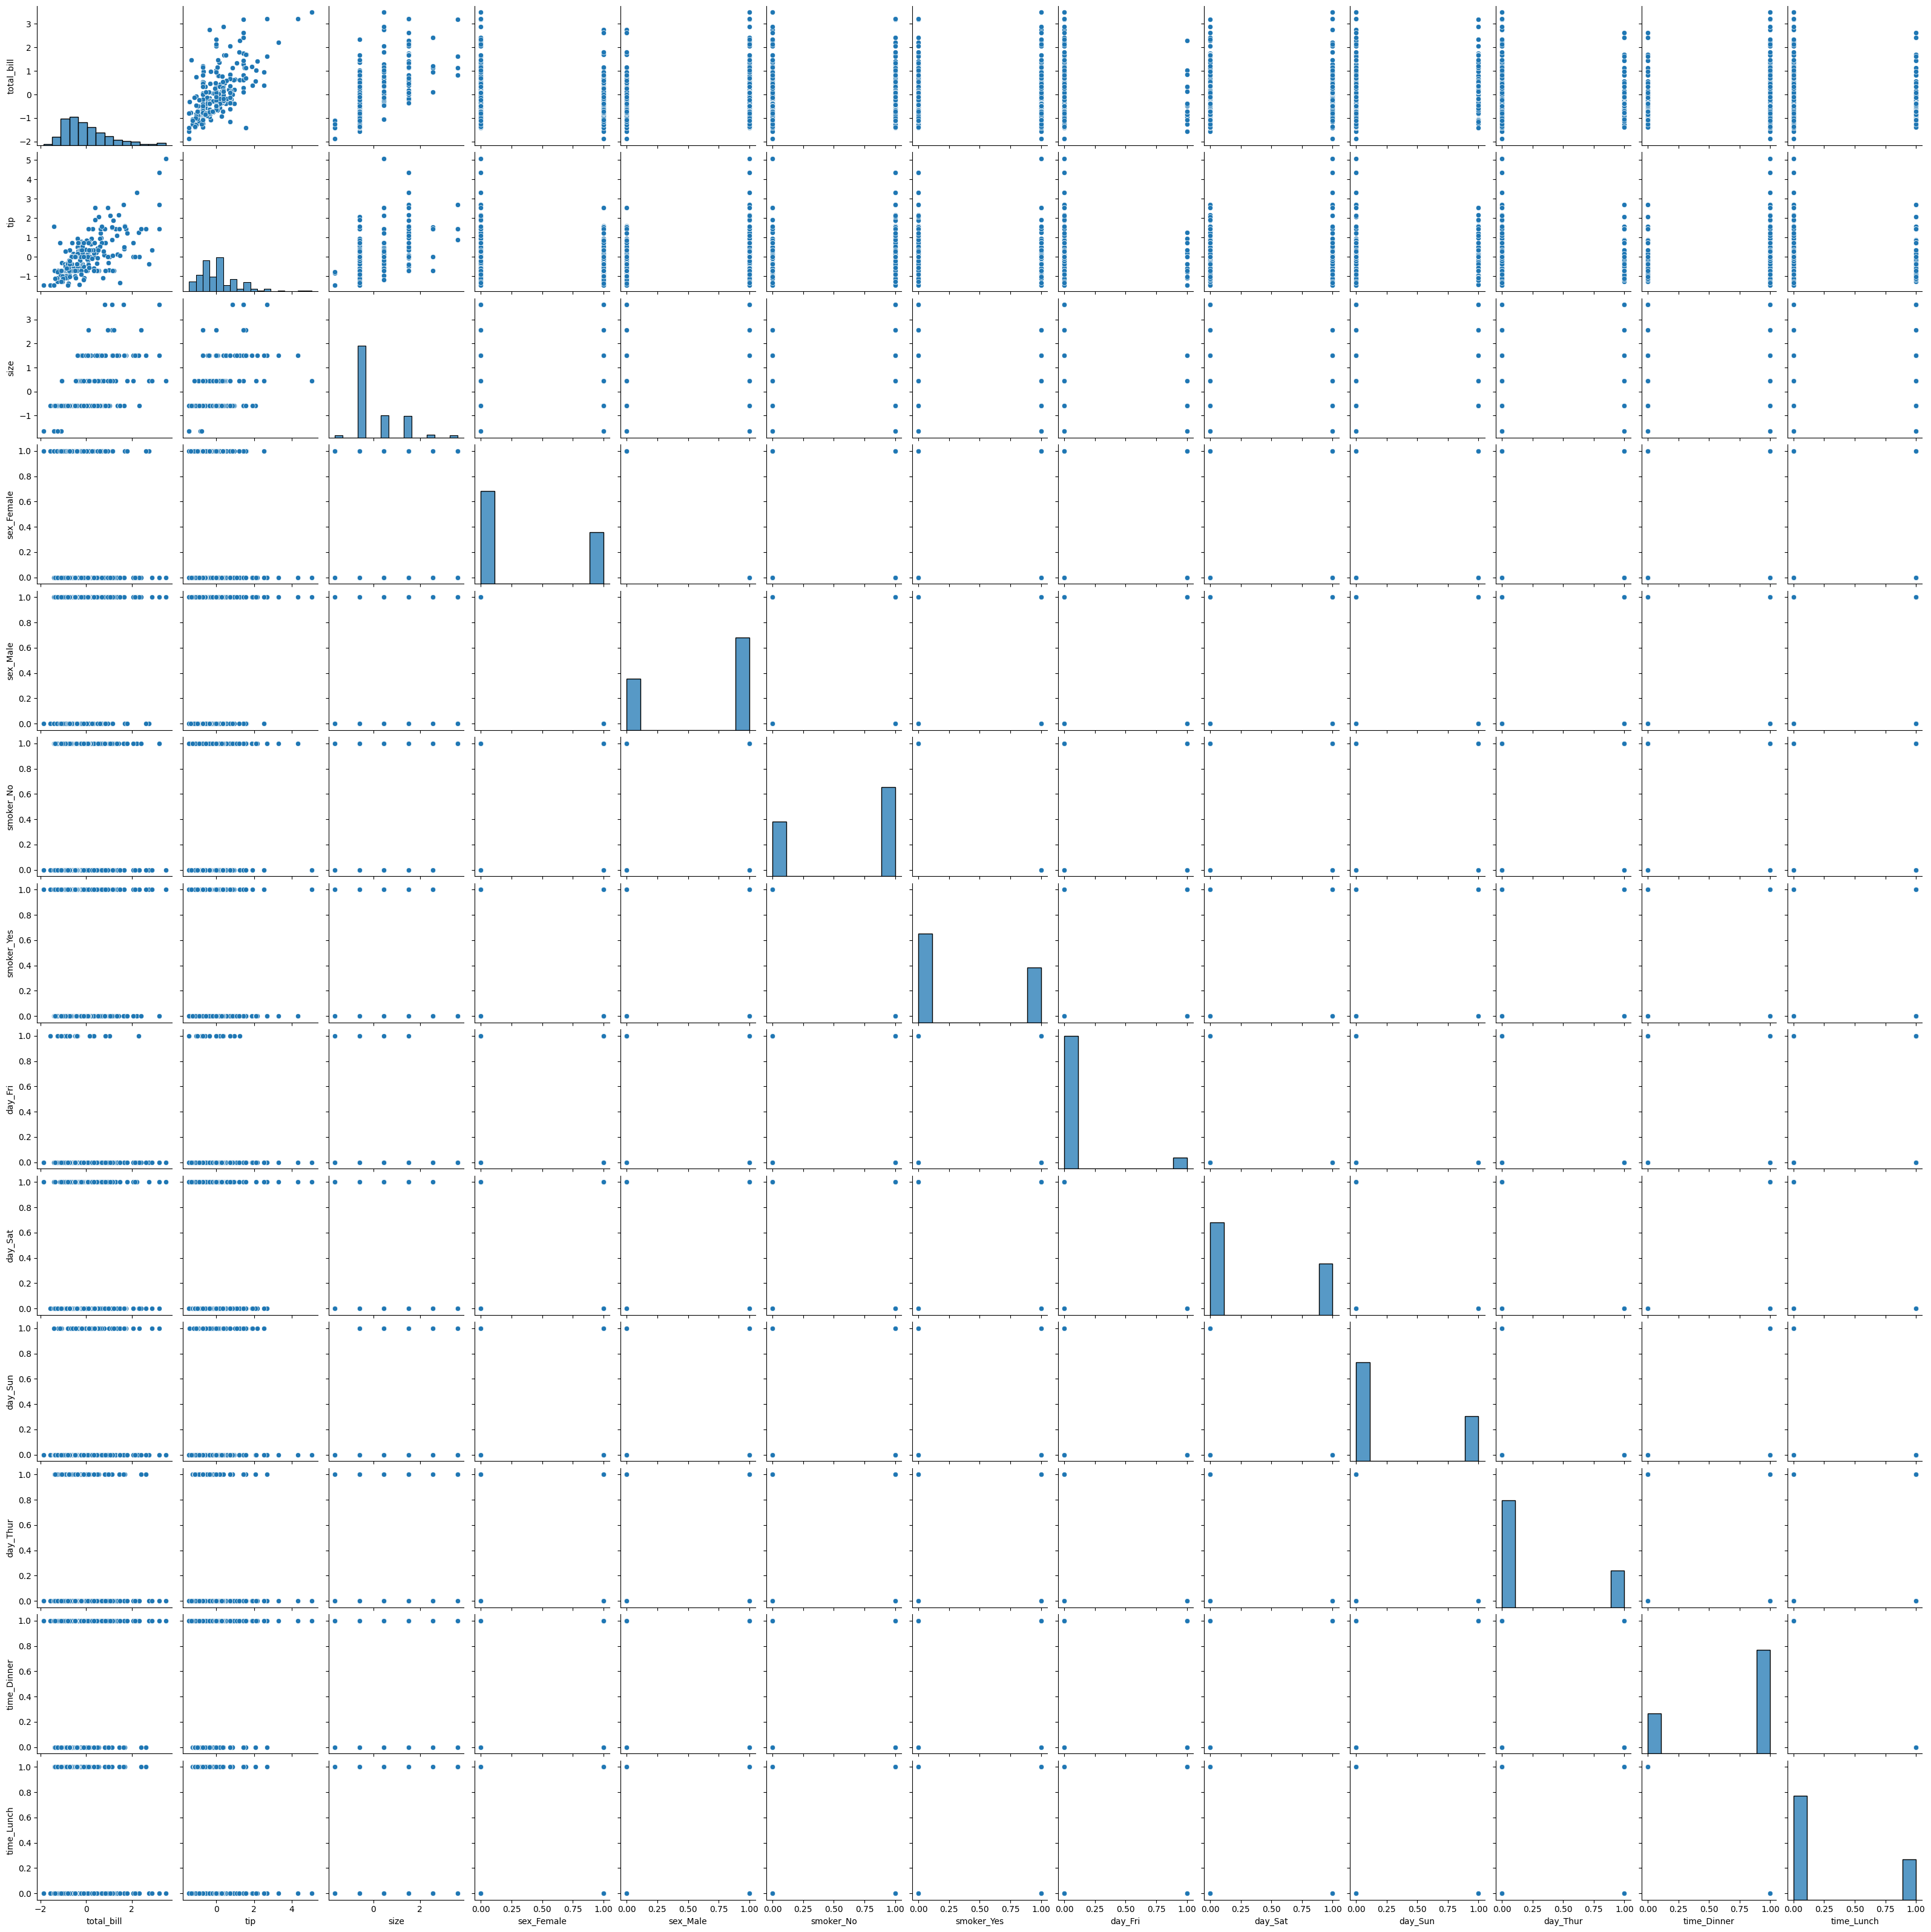

In [6]:
import seaborn as sns

sns.pairplot(data_encoded)
plt.show()


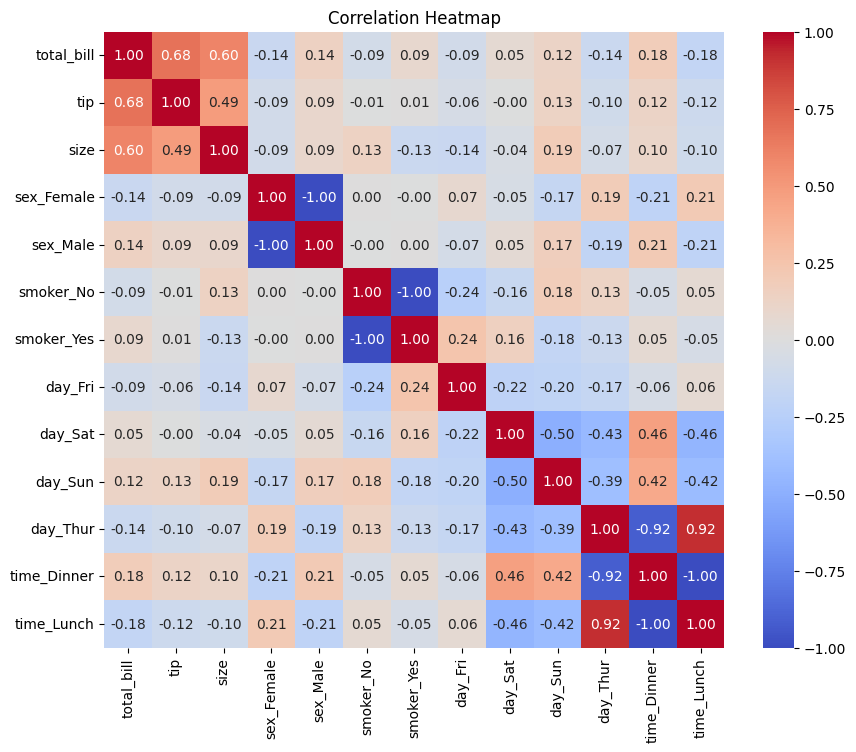

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


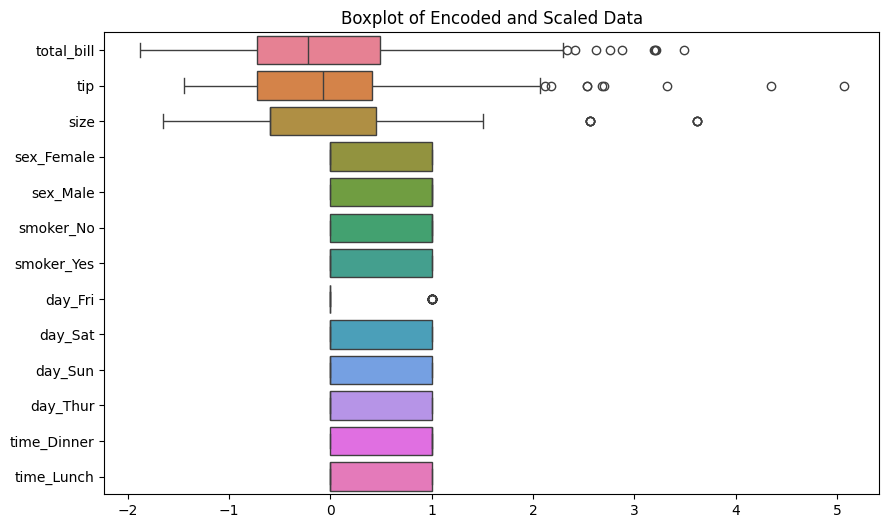

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_encoded, orient="h")
plt.title('Boxplot of Encoded and Scaled Data')
plt.show()


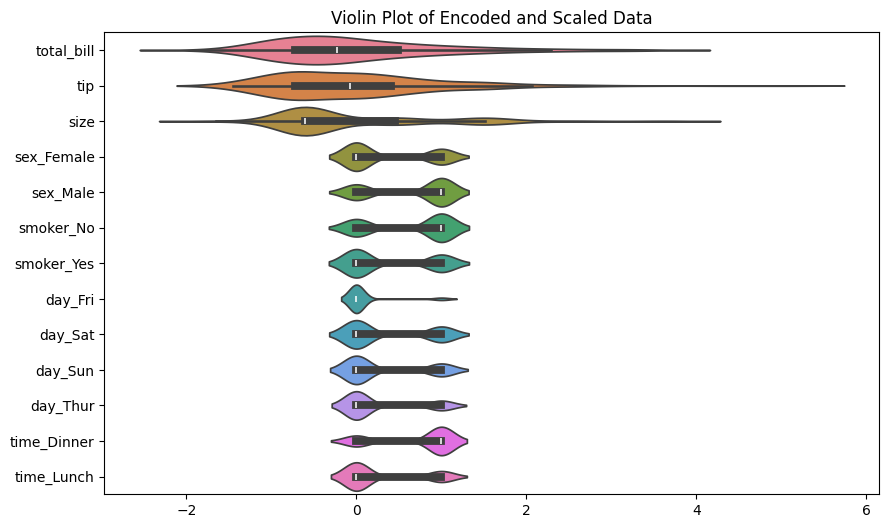

In [9]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data_encoded, orient="h")
plt.title('Violin Plot of Encoded and Scaled Data')
plt.show()


#Algorithm
#K-Means Clustering:

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_encoded)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

#Agglomerative Hierarchical Clustering:

In [11]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_clustering.fit_predict(data_encoded)


#DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

In [12]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(data_encoded)


#Gaussian Mixture Model (GMM):

In [13]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(data_encoded)


GaussianMixture(n_components=3, random_state=42)

#Mean Shift:

In [14]:
from sklearn.cluster import MeanShift

meanshift = MeanShift()
meanshift.fit(data_encoded)


MeanShift()

#Birch Clustering:

In [15]:
from sklearn.cluster import Birch

birch = Birch(n_clusters=3)
birch.fit(data_encoded)


Birch()

#Perfomance measure of each algorithm

In [16]:
from sklearn.metrics import silhouette_score

# Silhouette score for K-Means
kmeans_silhouette = silhouette_score(data_encoded, kmeans.labels_)

# Silhouette score for Agglomerative Hierarchical Clustering
agg_silhouette = silhouette_score(data_encoded, agg_clusters)

# Silhouette score for DBSCAN
dbscan_silhouette = silhouette_score(data_encoded, dbscan.labels_)

# Silhouette score for Gaussian Mixture Model
gmm_silhouette = silhouette_score(data_encoded, gmm.predict(data_encoded))

# Silhouette score for Mean Shift
meanshift_silhouette = silhouette_score(data_encoded, meanshift.labels_)

# Silhouette score for Birch
birch_silhouette = silhouette_score(data_encoded, birch.labels_)

print("Silhouette Score for K-Means:", kmeans_silhouette)
print("Silhouette Score for Agglomerative Hierarchical Clustering:", agg_silhouette)
print("Silhouette Score for DBSCAN:", dbscan_silhouette)
print("Silhouette Score for Gaussian Mixture Model:", gmm_silhouette)
print("Silhouette Score for Mean Shift:", meanshift_silhouette)
print("Silhouette Score for Birch:", birch_silhouette)


Silhouette Score for K-Means: 0.22580878240826757
Silhouette Score for Agglomerative Hierarchical Clustering: 0.20939505660456073
Silhouette Score for DBSCAN: -0.05035547978982278
Silhouette Score for Gaussian Mixture Model: 0.09482076418028329
Silhouette Score for Mean Shift: 0.3812550450770027
Silhouette Score for Birch: 0.1831039992335051


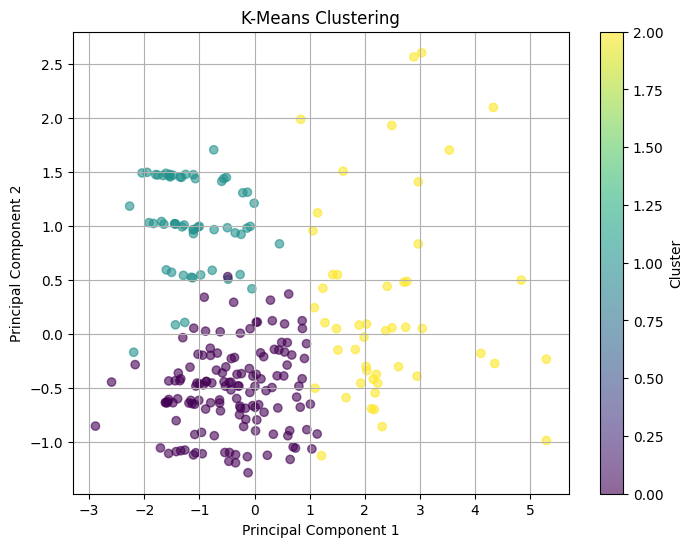

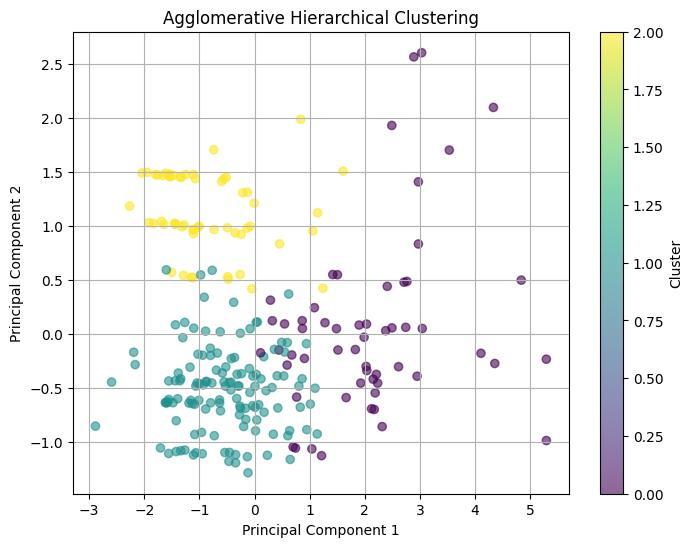

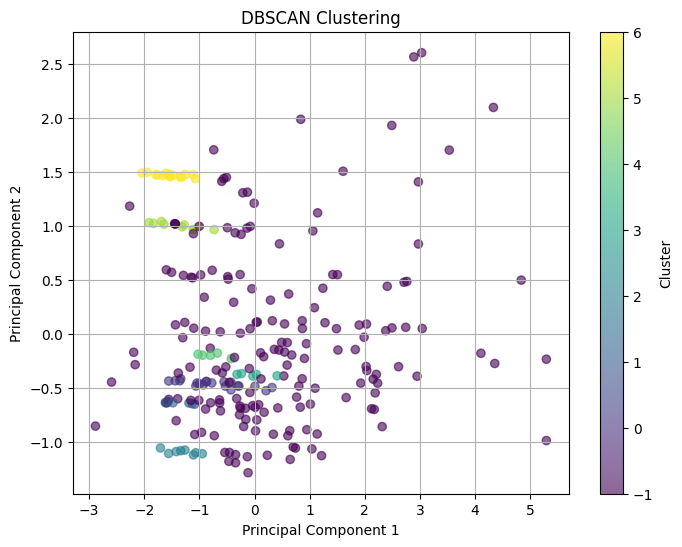

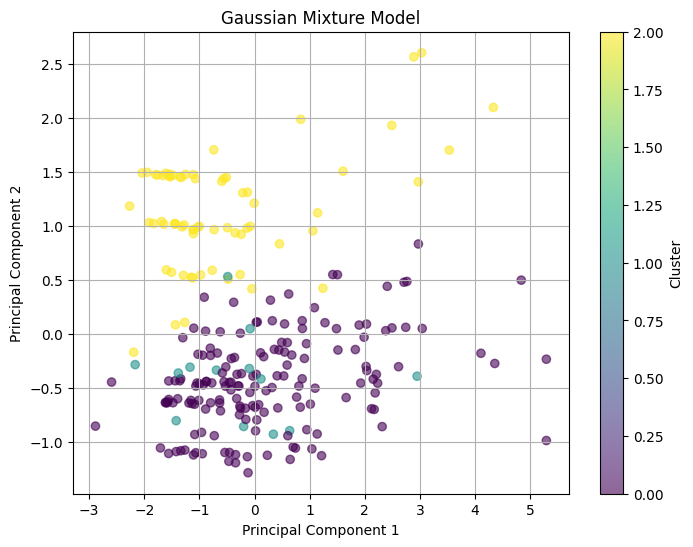

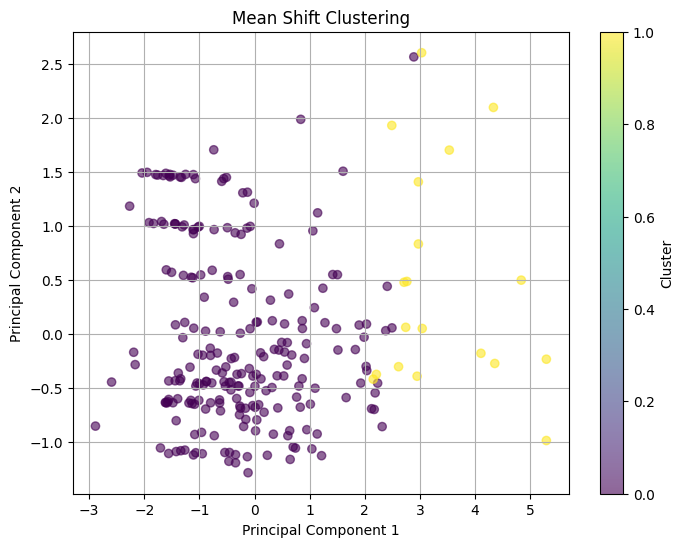

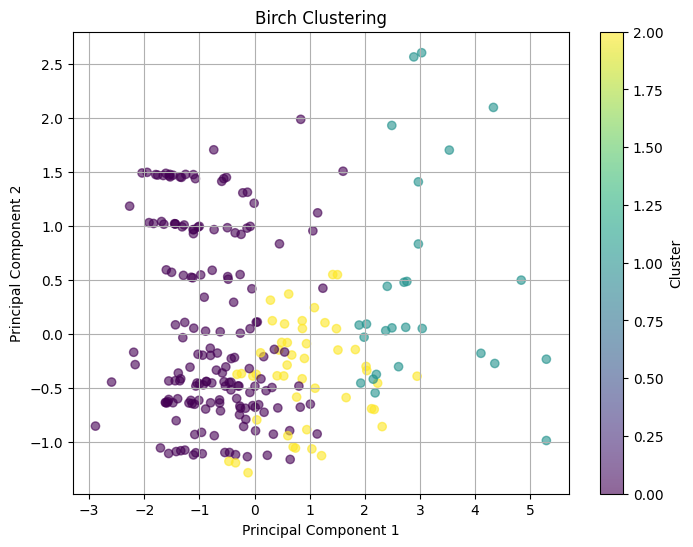

In [17]:
import matplotlib.pyplot as plt

# Plot clusters for K-Means
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', alpha=0.6)
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

# Plot clusters for Agglomerative Hierarchical Clustering
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=agg_clusters, cmap='viridis', marker='o', alpha=0.6)
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

# Plot clusters for DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=dbscan.labels_, cmap='viridis', marker='o', alpha=0.6)
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

# Plot clusters for Gaussian Mixture Model
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=gmm.predict(data_encoded), cmap='viridis', marker='o', alpha=0.6)
plt.title('Gaussian Mixture Model')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

# Plot clusters for Mean Shift
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=meanshift.labels_, cmap='viridis', marker='o', alpha=0.6)
plt.title('Mean Shift Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

# Plot clusters for Birch
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=birch.labels_, cmap='viridis', marker='o', alpha=0.6)
plt.title('Birch Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()


In [18]:
# Calculate the maximum silhouette score among all algorithms
max_silhouette_score = max(kmeans_silhouette, agg_silhouette, dbscan_silhouette, gmm_silhouette, meanshift_silhouette, birch_silhouette)

# Store the most efficient algorithm
most_efficient_algorithm = None

if max_silhouette_score == kmeans_silhouette:
    most_efficient_algorithm = "K-Means Clustering"
elif max_silhouette_score == agg_silhouette:
    most_efficient_algorithm = "Agglomerative Hierarchical Clustering"
elif max_silhouette_score == dbscan_silhouette:
    most_efficient_algorithm = "DBSCAN"
elif max_silhouette_score == gmm_silhouette:
    most_efficient_algorithm = "Gaussian Mixture Model"
elif max_silhouette_score == meanshift_silhouette:
    most_efficient_algorithm = "Mean Shift Clustering"
elif max_silhouette_score == birch_silhouette:
    most_efficient_algorithm = "Birch Clustering"

# Print the most efficient algorithm
print("The most efficient algorithm is:", most_efficient_algorithm)


The most efficient algorithm is: Mean Shift Clustering
